<a href="https://colab.research.google.com/github/Akashpandey82/google-colab/blob/master/Practicenotebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
fp1= '/content/drive/My Drive/name.basics.csv'
fp2= '/content/drive/My Drive/title.akas.csv'
fp3= '/content/drive/My Drive/title.basics.csv'
fp4='/content/drive/My Drive/title.crew.csv'
fp5 = '/content/drive/My Drive/title.episode.csv'
fp6= '/content/drive/My Drive/title.principals.csv'
fp7= '/content/drive/My Drive/title.ratings.csv'

In [3]:
genre_data = pd.read_csv(fp3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
genre_data=genre_data.replace(r'\N',np.nan)
genre_data.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [0]:
genre_data['runtimeMinutes']=pd.to_numeric(genre_data['runtimeMinutes'], errors='coerce')
genre_data['startYear']=pd.to_numeric(genre_data['startYear'],errors='coerce')
genre_data['endYear']=pd.to_numeric(genre_data['endYear'],errors='coerce')
genre_data.runtimeMinutes=genre_data.runtimeMinutes.fillna(genre_data.runtimeMinutes.mean()).round(2)

**extra worak**

In [0]:
df = genre_data.copy()

In [8]:
df.dropna()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
35188,35188,tt0035803,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940.0,1945.0,12.00,"Documentary,News"
38451,38451,tt0039120,tvSeries,Americana,Americana,0,1947.0,1949.0,30.00,"Family,Game-Show"
38452,38452,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947.0,1949.0,30.00,Family
38454,38454,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947.0,1958.0,60.00,Drama
38456,38456,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0,1947.0,1951.0,20.00,"Crime,Drama,Mystery"
...,...,...,...,...,...,...,...,...,...,...
6745605,6745605,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018.0,2018.0,5.00,Comedy
6745699,6745699,tt9915530,tvSeries,The Land F.A.U.,The Land F.A.U.,0,2019.0,2019.0,44.78,Crime
6745828,6745828,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016.0,2017.0,20.00,Fantasy
6746010,6746010,tt9916216,tvSeries,Kalyanam Mudhal Kadhal Varai,Kalyanam Mudhal Kadhal Varai,0,2014.0,2017.0,22.00,Romance


In [10]:
df[df.isnull()].count()

Unnamed: 0        0
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [0]:
ratings_data = pd.read_csv(fp7)
ratings_data = pd.merge(df,ratings_data,on = 'tconst')


In [12]:
ratings_data.head()

,Unnamed: 0_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Unnamed: 0_y,averageRating,numVotes
0,0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short",0,5.6,1608
1,1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5.0,"Animation,Short",1,6.0,197
2,2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4.0,"Animation,Comedy,Romance",2,6.5,1286
3,3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12.0,"Animation,Short",3,6.1,121
4,4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1.0,"Comedy,Short",4,6.1,2051


In [17]:
ratings_data.drop(ratings_data.columns[8],axis=1 , inplace= True)
ratings_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.6,1608
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",6.0,197
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,4.0,"Animation,Comedy,Romance",6.5,1286
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,12.0,"Animation,Short",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.1,2051


In [21]:
principal_added = pd.merge(data_principals, ratings_data, on = 'tconst')
principal_added.head()

,tconst,ordering,nconst,category,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,nm1588970,self,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.6,1608
1,tt0000001,2,nm0005690,director,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.6,1608
2,tt0000001,3,nm0374658,cinematographer,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.6,1608
3,tt0000002,1,nm0721526,director,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",6.0,197
4,tt0000002,2,nm1335271,composer,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",6.0,197


In [22]:
name_basics_data = pd.read_csv(fp1)
names_data = name_basics_data[['nconst', 'primaryName']]
final_data = pd.merge(names_data,principal_added,on='nconst')
final_data.head()

,nconst,primaryName,tconst,ordering,category,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,nm0000001,Fred Astaire,tt0025164,1,actor,movie,The Gay Divorcee,The Gay Divorcee,0,1934.0,107.0,"Comedy,Musical,Romance",7.5,6569
1,nm0000001,Fred Astaire,tt0026942,2,actor,movie,Roberta,Roberta,0,1935.0,106.0,"Comedy,Musical,Romance",7.1,2799
2,nm0000001,Fred Astaire,tt0027125,1,actor,movie,Top Hat,Top Hat,0,1935.0,101.0,"Comedy,Musical,Romance",7.8,16492
3,nm0000001,Fred Astaire,tt0027630,1,actor,movie,Follow the Fleet,Follow the Fleet,0,1936.0,110.0,"Comedy,Musical,Romance",7.2,3814
4,nm0000001,Fred Astaire,tt0028333,1,actor,movie,Swing Time,Swing Time,0,1936.0,103.0,"Comedy,Musical,Romance",7.6,11703


In [0]:
final_data1 = final_data.copy()

In [28]:
final_data.drop(final_data1.columns[4],axis=1 , inplace= True)
final_data1.head()

,primaryName,ordering,category,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Fred Astaire,1,actor,movie,0,1934.0,107.0,"Comedy,Musical,Romance",7.5,6569
1,Fred Astaire,2,actor,movie,0,1935.0,106.0,"Comedy,Musical,Romance",7.1,2799
2,Fred Astaire,1,actor,movie,0,1935.0,101.0,"Comedy,Musical,Romance",7.8,16492
3,Fred Astaire,1,actor,movie,0,1936.0,110.0,"Comedy,Musical,Romance",7.2,3814
4,Fred Astaire,1,actor,movie,0,1936.0,103.0,"Comedy,Musical,Romance",7.6,11703


In [0]:
final_data2 = final_data1.copy()

In [40]:
final_data2['genres'] = final_data2['genres'].str.split(",",n=1,expand=True)
final_data2.head()

,primaryName,ordering,category,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Fred Astaire,1,actor,movie,0,1934.0,107.0,Comedy,7.5,6569
1,Fred Astaire,2,actor,movie,0,1935.0,106.0,Comedy,7.1,2799
2,Fred Astaire,1,actor,movie,0,1935.0,101.0,Comedy,7.8,16492
3,Fred Astaire,1,actor,movie,0,1936.0,110.0,Comedy,7.2,3814
4,Fred Astaire,1,actor,movie,0,1936.0,103.0,Comedy,7.6,11703


In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

In [55]:
#final_data2['primaryName']= label_encoder.fit_transform(final_data2['primaryName']) 
#final_data2['category']= label_encoder.fit_transform(final_data2['category']) 
#final_data2['titleType']= label_encoder.fit_transform(final_data2['titleType']) 
final_data2['genres']= label_encoder.fit_transform(final_data2['genres'].astype(str)) 
final_data2.head()

,primaryName,ordering,category,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,440731,1,0,0,0,1934.0,107.0,5,7.5,6569
1,440731,2,0,0,0,1935.0,106.0,5,7.1,2799
2,440731,1,0,0,0,1935.0,101.0,5,7.8,16492
3,440731,1,0,0,0,1936.0,110.0,5,7.2,3814
4,440731,1,0,0,0,1936.0,103.0,5,7.6,11703


In [4]:
final_data2 = pd.read_csv('/content/drive/My Drive/encode_data.csv')
final_data2.head()

,Unnamed: 0,primaryName,ordering,category,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,0,440731,1,0,0,0,1934.0,107.0,5,7.5,6569
1,1,440731,2,0,0,0,1935.0,106.0,5,7.1,2799
2,2,440731,1,0,0,0,1935.0,101.0,5,7.8,16492
3,3,440731,1,0,0,0,1936.0,110.0,5,7.2,3814
4,4,440731,1,0,0,0,1936.0,103.0,5,7.6,11703


In [6]:
final_data2.drop(final_data2.columns[0],axis=1 , inplace= True)
final_data2.head()

,primaryName,ordering,category,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,440731,1,0,0,0,1934.0,107.0,5,7.5,6569
1,440731,2,0,0,0,1935.0,106.0,5,7.1,2799
2,440731,1,0,0,0,1935.0,101.0,5,7.8,16492
3,440731,1,0,0,0,1936.0,110.0,5,7.2,3814
4,440731,1,0,0,0,1936.0,103.0,5,7.6,11703


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
mod = smf.ols(formula='averageRating ~primaryName+category +titleType+isAdult+runtimeMinutes +genres+numVotes', data=final_data2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 5.373e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:04   Log-Likelihood:            -1.7608e+07
No. Observations:            10322472   AIC:                         3.522e+07
Df Residuals:                10322464   BIC:                         3.522e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.0740      0.001   5696.

In [0]:
res = mod.fit()

In [65]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                 5.883e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:06:38   Log-Likelihood:            -1.7532e+07
No. Observations:            10321133   AIC:                         3.506e+07
Df Residuals:                10321123   BIC:                         3.506e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7926      0.040    -95.

In [0]:
final_data2.to_csv('/content/drive/My Drive/encode_data.csv')

In [64]:
expo = final_data1['genres'].str.split(",",expand=True)
expo.hea

KeyboardInterrupt: ignored

In [51]:
expo.columns = ['genre1','genre2','genre3']
expo.head()

,genre1,genre2,genre3
0,Comedy,Musical,Romance
1,Comedy,Musical,Romance
2,Comedy,Musical,Romance
3,Comedy,Musical,Romance
4,Comedy,Musical,Romance


In [0]:

df[cat] = le.fit_transform(df[cat].astype(str))


In [0]:
expo['genre3']= label_encoder.fit_transform(expo['genre3'].astype(str)) 

In [0]:
final_data1['category'].nunique()
final_data1['primaryName'].nunique()
print(final_data1['category'].nunique())

**xtra work ends herea**

In [0]:
genre_votes_data = pd.merge(genre_data,ratings_data,on = 'tconst')
sorted_data=genre_votes_data.sort_values(by='numVotes',ascending=False)
sorted_data1=sorted_data.copy()
sorted_data1=sorted_data1.set_index(sorted_data1.columns.drop('genres',1).tolist()).genres.str.split(',',expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, sorted_data1.columns]
sorted_data1['genres']=sorted_data1['genres'].astype(str)
sorted_data1['genres'].value_counts().head()

Drama          338538
Comedy         326305
Short          135349
Documentary    120290
Action         120181
Name: genres, dtype: int64

In [0]:
genress=['Drama','Comedy','Short','Action','Documentary','Animation','Adventure','Crime','Family','Romance', 'Music','Reality-TV','Mystery','Horror','Thriller','Fantasy','Talk-Show','Sci-Fi','History','Game-Show','Biography','Adult','Sport','News',
     'Western','War','Musical','Film-Noir']
genre_list=[]
for genre in genress:
    s=sorted_data1[sorted_data1['genres']==genre]['numVotes'].sum()
    genre_list.append(s)
print(genre_list)

[506927658, 301497055, 6388095, 297835702, 16131503, 70005145, 256328805, 191203662, 54090785, 118861839, 19612110, 2375207, 100496344, 85095879, 150762702, 95882642, 1719565, 117465439, 29734729, 1032913, 56291218, 385431, 16294726, 1094726, 8940903, 18705323, 8579672, 2944442]


In [0]:
num_votes_data=pd.DataFrame({'genres':genress,'numVotes':genre_list})
num_votes_data.head()

,genres,numVotes
0,Drama,506927658
1,Comedy,301497055
2,Short,6388095
3,Action,297835702
4,Documentary,16131503


Ques 2 



In [0]:
data_principals = pd.read_csv(fp6)

In [0]:
data_principals=data_principals[['tconst','ordering','nconst','category']]

In [0]:
actor_dir_data =data_principals[data_principals['category'].isin(['actor','director'])]

In [0]:
name_basics_data = pd.read_csv(fp1)
names_data = name_basics_data[['nconst', 'primaryName']]
names_act_dir = pd.merge(names_data,actor_dir_data,on='nconst')
ratings_data = pd.read_csv(fp7)
actor_dir_ratings=pd.merge(ratings_data,names_act_dir,on='tconst')
actor_data=actor_dir_ratings[actor_dir_ratings['category']=='actor']
dir_data=actor_dir_ratings[(actor_dir_ratings['category']=='director')]
final_act_dir = pd.merge(actor_data,dir_data,on='tconst')
final_act_dir=final_act_dir[['tconst','category_x','primaryName_x','category_y', 'primaryName_y','averageRating_y']]
final_act_dir.columns=['tconst','category_x','primaryName_x','category_y', 'primaryName_y','averageRating']
final_sorted_data=final_act_dir.sort_values(by='averageRating',ascending=False)
final_sorted_data.head()

,tconst,category_x,primaryName_x,category_y,primaryName_y,averageRating
1553041,tt10471404,actor,Tony Hawk,director,Smileybs,10.0
2620640,tt6525542,actor,Pragyaj Jain,director,Noel Smith,10.0
1572259,tt1069840,actor,Max Elliott Slade,director,Allan Arkush,10.0
2696618,tt7464942,actor,Thomas Ababio,director,Will Carne,10.0
2696619,tt7464944,actor,Anastasios Xatzopoulos,director,Apostolos Karoulas,10.0


These are famous actor director pair

ques 3

In [0]:
name_basics= pd.read_csv(fp1)
name_basics.head()

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308"
1,1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0037382,tt0117057"
2,2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0049189,tt0059956,tt0057345"
3,3,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0049189,tt0059956,tt0057345"
4,4,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"


In [0]:
name_basics=name_basics[['nconst','primaryName','birthYear']]
name_basics.head()

,nconst,primaryName,birthYear
0,nm0000001,Fred Astaire,1899
1,nm0000002,Lauren Bacall,1924
2,nm0000003,Brigitte Bardot,1934
3,nm0000003,Brigitte Bardot,1934
4,nm0000004,John Belushi,1949


In [0]:
principal = pd.read_csv(fp6)


In [0]:
principal=principal[['tconst','ordering','nconst','category']]
principal.head()

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer


In [0]:
principal=principal[principal['category']=='actor']
principal=principal[principal['ordering'] == 1]
principal.head()

,tconst,ordering,nconst,category
11,tt0000005,1,nm0443482,actor
16,tt0000007,1,nm0179163,actor
21,tt0000008,1,nm0653028,actor
29,tt0000011,1,nm3692297,actor
42,tt0000014,1,nm0166380,actor


In [0]:
data_name= pd.merge(name_basics,principal,on='nconst')
data_name.head()

,nconst,primaryName,birthYear,tconst,ordering,category
0,nm0000001,Fred Astaire,1899,tt0025164,1,actor
1,nm0000001,Fred Astaire,1899,tt0027125,1,actor
2,nm0000001,Fred Astaire,1899,tt0027630,1,actor
3,nm0000001,Fred Astaire,1899,tt0028333,1,actor
4,nm0000001,Fred Astaire,1899,tt0028757,1,actor


In [0]:
print(data_name.shape)
print(principal.shape)
print(name_basics.shape)

(2602013, 6)
(2129420, 4)
(10275124, 3)


In [0]:
ratings_data=pd.read_csv(fp7)

In [0]:
name_ratings_data= pd.merge(data_name,ratings_data,on='tconst')

In [0]:
name_ratings_data.head()

,nconst,primaryName,birthYear,tconst,ordering,category,Unnamed: 0,averageRating,numVotes
0,nm0000001,Fred Astaire,1899,tt0025164,1,actor,9173,7.5,6569
1,nm0000001,Fred Astaire,1899,tt0027125,1,actor,10639,7.8,16492
2,nm0000001,Fred Astaire,1899,tt0027630,1,actor,11020,7.2,3814
3,nm0000001,Fred Astaire,1899,tt0028333,1,actor,11570,7.6,11703
4,nm0000001,Fred Astaire,1899,tt0028757,1,actor,11889,6.8,1699


In [0]:
title_basics = pd.read_csv(fp3)
title_basics=title_basics[['tconst','titleType','originalTitle','startYear']]
title_basics.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,originalTitle,startYear
0,tt0000001,short,Carmencita,1894
1,tt0000002,short,Le clown et ses chiens,1892
2,tt0000003,short,Pauvre Pierrot,1892
3,tt0000004,short,Un bon bock,1892
4,tt0000005,short,Blacksmith Scene,1893


In [0]:
actor_data=pd.merge(name_ratings_data,title_basics,on='tconst')
actor_data.head()

,nconst,primaryName,birthYear,tconst,ordering,category,Unnamed: 0,averageRating,numVotes,titleType,originalTitle,startYear
0,nm0000001,Fred Astaire,1899,tt0025164,1,actor,9173,7.5,6569,movie,The Gay Divorcee,1934
1,nm0000001,Fred Astaire,1899,tt0027125,1,actor,10639,7.8,16492,movie,Top Hat,1935
2,nm0000001,Fred Astaire,1899,tt0027630,1,actor,11020,7.2,3814,movie,Follow the Fleet,1936
3,nm0000001,Fred Astaire,1899,tt0028333,1,actor,11570,7.6,11703,movie,Swing Time,1936
4,nm0000001,Fred Astaire,1899,tt0028757,1,actor,11889,6.8,1699,movie,A Damsel in Distress,1937


In [0]:
actor_data['startYear']=pd.to_numeric(actor_data['startYear'],errors='coerce')
actor_data['birthYear']=pd.to_numeric(actor_data['birthYear'],errors='coerce')
actor_data['ageBracket']=actor_data['startYear']-actor_data['birthYear']
actor_data1=actor_data[actor_data['numVotes']>=10]
actor_data1.head()

,nconst,primaryName,birthYear,tconst,ordering,category,Unnamed: 0,averageRating,numVotes,titleType,originalTitle,startYear,ageBracket
0,nm0000001,Fred Astaire,1899.0,tt0025164,1,actor,9173,7.5,6569,movie,The Gay Divorcee,1934.0,35.0
1,nm0000001,Fred Astaire,1899.0,tt0027125,1,actor,10639,7.8,16492,movie,Top Hat,1935.0,36.0
2,nm0000001,Fred Astaire,1899.0,tt0027630,1,actor,11020,7.2,3814,movie,Follow the Fleet,1936.0,37.0
3,nm0000001,Fred Astaire,1899.0,tt0028333,1,actor,11570,7.6,11703,movie,Swing Time,1936.0,37.0
4,nm0000001,Fred Astaire,1899.0,tt0028757,1,actor,11889,6.8,1699,movie,A Damsel in Distress,1937.0,38.0


In [0]:
actor_data1=actor_data1.sort_values(by='numVotes',ascending=False)
actor_data1.head()

,nconst,primaryName,birthYear,tconst,ordering,category,Unnamed: 0,averageRating,numVotes,titleType,originalTitle,startYear,ageBracket
8026,nm0000209,Tim Robbins,1958.0,tt0111161,1,actor,80835,9.3,2225066,movie,The Shawshank Redemption,1994.0,36.0
11655,nm0000288,Christian Bale,1974.0,tt0468569,1,actor,242523,9.0,2199095,movie,The Dark Knight,2008.0,34.0
5169,nm0000138,Leonardo DiCaprio,1974.0,tt1375666,1,actor,536202,8.8,1951015,movie,Inception,2010.0,36.0
3097,nm0000093,Brad Pitt,1963.0,tt0137523,1,actor,96986,8.8,1773186,movie,Fight Club,1999.0,36.0
9273,nm0000237,John Travolta,1954.0,tt0110912,1,actor,80619,8.9,1745344,movie,Pulp Fiction,1994.0,40.0


In [0]:
actor_data1['ageBracket'].value_counts().head()

39.0    14315
36.0    14306
38.0    14224
37.0    14086
40.0    13720
Name: ageBracket, dtype: int64

so we find that most of the successful actor are in age bracket of 39.

In [0]:
#now we will merge 
#both actor and director
actor_director=pd.merge(actor,director,on='tconst')

In [0]:
actor_director.head()

,Unnamed: 0_x_x,nconst_x,primaryName_x,birthYear_x,deathYear_x,primaryProfession_x,knownForTitles_x,Unnamed: 0_y_x,tconst,ordering_x,category_x,job_x,characters_x,Unnamed: 0_x,averageRating_x,numVotes_x,Unnamed: 0_x_y,nconst_y,primaryName_y,birthYear_y,deathYear_y,primaryProfession_y,knownForTitles_y,Unnamed: 0_y_y,ordering_y,category_y,job_y,characters_y,Unnamed: 0_y,averageRating_y,numVotes_y
0,377,nm0000274,David Arquette,1971,\N,"producer,actor,director","tt0271367,tt0134084,tt0151738,tt0120082",16553056,tt1576810,10,actor,\N,"[""Tod Hawks""]",571567,10.0,161,458617,nm0440105,Matia Karrell,\N,\N,"director,assistant_director,camera_department","tt0094825,tt0282891,tt0859592,tt0200276",16553061,5,director,\N,\N,571567,10.0,161
1,1227,nm0000893,Ed Begley Jr.,1949,\N,"actor,producer,director","tt1289401,tt0310281,tt0910936,tt1178663",16553057,tt1576810,1,actor,\N,"[""Gil Buckman""]",571567,10.0,161,458617,nm0440105,Matia Karrell,\N,\N,"director,assistant_director,camera_department","tt0094825,tt0282891,tt0859592,tt0200276",16553061,5,director,\N,\N,571567,10.0,161
2,512890,nm0492226,Zachary La Voy,1986,\N,"actor,writer","tt0098887,tt0098067,tt3587736,tt2262221",16553063,tt1576810,7,actor,\N,"[""Justin Buckman""]",571567,10.0,161,458617,nm0440105,Matia Karrell,\N,\N,"director,assistant_director,camera_department","tt0094825,tt0282891,tt0859592,tt0200276",16553061,5,director,\N,\N,571567,10.0,161
3,834568,nm0805189,Max Elliott Slade,1980,\N,actor,"tt0109015,tt0112384,tt0098067,tt0103596",16553059,tt1576810,3,actor,\N,"[""Kevin Buckman""]",571567,10.0,161,458617,nm0440105,Matia Karrell,\N,\N,"director,assistant_director,camera_department","tt0094825,tt0282891,tt0859592,tt0200276",16553061,5,director,\N,\N,571567,10.0,161
4,377,nm0000274,David Arquette,1971,\N,"producer,actor,director","tt0271367,tt0134084,tt0151738,tt0120082",16553096,tt1576814,10,actor,\N,"[""Tod Hawks""]",571571,10.0,161,38321,nm0035106,Allan Arkush,1948,\N,"producer,director,actor","tt0164292,tt0813715,tt2288064,tt0284718",16553101,5,director,\N,\N,571571,10.0,161


this is question 3 

1.   we have to find in which age gap male lead are most successful
2.  we will do ad following

---





In [0]:
#loading the data 
data_3= pd.merge( genre,ratings ,on='tconst')

In [0]:
# data_3 is raitings of actor and director
rating_act_dir=data_3


In [0]:
rating_act_dir.head()

,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",191484,tt0025164,1,actor,\N,"[""Guy Holden""]",9173,7.5,6569
1,2296,nm0001677,Ginger Rogers,1911,1995,"actress,soundtrack","tt0032671,tt0034299,tt0035019,tt0044916",191485,tt0025164,2,actress,\N,"[""Mimi Glossop""]",9173,7.5,6569
2,2297,nm0001677,Ginger Rogers,1911,1995,"actress,soundtrack","tt0032671,tt0034299,tt0035019,tt0044916",191485,tt0025164,2,actress,\N,"[""Mimi Glossop""]",9173,7.5,6569
3,2928,nm0002143,Edward Everett Horton,1886,1970,"actor,soundtrack,director","tt0036613,tt0027125,tt0030241,tt0057193",191487,tt0025164,4,actor,\N,"[""Egbert 'Pinky' Fitzgerald""]",9173,7.5,6569
4,110021,nm0103567,Alice Brady,1892,1939,"actress,soundtrack","tt0029047,tt0025164,tt0024609,tt0028010",191486,tt0025164,3,actress,\N,"[""Aunt Hortense""]",9173,7.5,6569


In [0]:
#creating new data base for actors
rating_actor=rating_act_dir[rating_act_dir['category']=='actor']
rating_actor.head()

,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",191484,tt0025164,1,actor,\N,"[""Guy Holden""]",9173,7.5,6569
3,2928,nm0002143,Edward Everett Horton,1886,1970,"actor,soundtrack,director","tt0036613,tt0027125,tt0030241,tt0057193",191487,tt0025164,4,actor,\N,"[""Egbert 'Pinky' Fitzgerald""]",9173,7.5,6569
13,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",206553,tt0026942,2,actor,\N,"[""Huck Haines""]",10492,7.1,2799
14,95,nm0000068,Randolph Scott,1898,1987,"actor,producer,soundtrack","tt0026942,tt0049743,tt0051047,tt0056412",206555,tt0026942,4,actor,\N,"[""John Kent""]",10492,7.1,2799
28,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",208124,tt0027125,1,actor,\N,"[""Jerry Travers""]",10639,7.8,16492


In [0]:
rating_actor.head()

,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",191484,tt0025164,1,actor,\N,"[""Guy Holden""]",9173,7.5,6569
3,2928,nm0002143,Edward Everett Horton,1886,1970,"actor,soundtrack,director","tt0036613,tt0027125,tt0030241,tt0057193",191487,tt0025164,4,actor,\N,"[""Egbert 'Pinky' Fitzgerald""]",9173,7.5,6569
13,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",206553,tt0026942,2,actor,\N,"[""Huck Haines""]",10492,7.1,2799
14,95,nm0000068,Randolph Scott,1898,1987,"actor,producer,soundtrack","tt0026942,tt0049743,tt0051047,tt0056412",206555,tt0026942,4,actor,\N,"[""John Kent""]",10492,7.1,2799
28,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",208124,tt0027125,1,actor,\N,"[""Jerry Travers""]",10639,7.8,16492


we will use the concept of quantile to get the most succesful actors and then we will see their age gap

In [0]:
mean = rating_actor['numVotes'].mean()

In [0]:
q = rating_actor['numVotes'].quantile(0.90)

In [0]:
q

557.0

In [0]:
q_df= rating_actor.copy()
quantile_data= q_df[q_df['numVotes']>=q]
quantile_data.shape
m=q
c=mean

Now we will define a function which will calculate weighted average of movie

In [0]:
def rating_weight(y,m=m,C=c):
  v=y['numVotes']
  r=y['averageRating']
  value= (v/(v+m))*r +(m/(m+v)*C)
  return value

In [0]:
quantile_data['scores']=quantile_data.apply(rating_weight,axis=1)
quantile_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes,scores
0,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",191484,tt0025164,1,actor,\N,"[""Guy Holden""]",9173,7.5,6569,111.709053
3,2928,nm0002143,Edward Everett Horton,1886,1970,"actor,soundtrack,director","tt0036613,tt0027125,tt0030241,tt0057193",191487,tt0025164,4,actor,\N,"[""Egbert 'Pinky' Fitzgerald""]",9173,7.5,6569,111.709053
13,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",206553,tt0026942,2,actor,\N,"[""Huck Haines""]",10492,7.1,2799,228.439843
14,95,nm0000068,Randolph Scott,1898,1987,"actor,producer,soundtrack","tt0026942,tt0049743,tt0051047,tt0056412",206555,tt0026942,4,actor,\N,"[""John Kent""]",10492,7.1,2799,228.439843
28,0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0050419,tt0072308",208124,tt0027125,1,actor,\N,"[""Jerry Travers""]",10639,7.8,16492,51.346637


In [0]:
quantile_data= quantile_data.sort_values('scores',ascending=True)
quantile_data.head()

,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes,scores
620180,3282592,nm1946193,Jamie Dornan,1982,\N,"actor,soundtrack","tt2294189,tt2368254,tt0422720,tt4190530",20447420,tt2322441,2,actor,\N,"[""Christian Grey""]",677543,4.1,289256,6.668855
620181,3282593,nm1946193,Jamie Dornan,1982,\N,"actor,soundtrack","tt2294189,tt2368254,tt0422720,tt4190530",20447420,tt2322441,2,actor,\N,"[""Christian Grey""]",677543,4.1,289256,6.668855
186977,775,nm0000563,Chris O'Donnell,1970,\N,"actor,producer,director","tt0105323,tt0118688,tt0108333,tt0190865",1010206,tt0118688,3,actor,\N,"[""Robin"",""Dick Grayson""]",86859,3.7,226687,6.977140
186974,297,nm0000216,Arnold Schwarzenegger,1947,\N,"actor,producer,director","tt0093773,tt0216216,tt0116213,tt0103064",1010204,tt0118688,1,actor,\N,"[""Mr. Freeze"",""Dr. Victor Fries""]",86859,3.7,226687,6.977140
186972,164,nm0000123,George Clooney,1961,\N,"actor,producer,director","tt1033575,tt1193138,tt1124035,tt0465538",1010205,tt0118688,2,actor,\N,"[""Batman"",""Bruce Wayne""]",86859,3.7,226687,6.977140


In [0]:
quantile_data['deathYear']=pd.to_numeric(quantile_data['deathYear'],errors='coerce')
quantile_data['birthYear']=pd.to_numeric(quantile_data['birthYear'],errors='coerce')

In [0]:
quantile_data.head()

,Unnamed: 0_x,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,Unnamed: 0_y,tconst,ordering,category,job,characters,Unnamed: 0,averageRating,numVotes,scores,ageBracket
620180,3282592,nm1946193,Jamie Dornan,1982.0,NaN,"actor,soundtrack","tt2294189,tt2368254,tt0422720,tt4190530",20447420,tt2322441,2,actor,\N,"[""Christian Grey""]",677543,4.1,289256,6.668855,NaN
620181,3282593,nm1946193,Jamie Dornan,1982.0,NaN,"actor,soundtrack","tt2294189,tt2368254,tt0422720,tt4190530",20447420,tt2322441,2,actor,\N,"[""Christian Grey""]",677543,4.1,289256,6.668855,NaN
186977,775,nm0000563,Chris O'Donnell,1970.0,NaN,"actor,producer,director","tt0105323,tt0118688,tt0108333,tt0190865",1010206,tt0118688,3,actor,\N,"[""Robin"",""Dick Grayson""]",86859,3.7,226687,6.977140,NaN
186974,297,nm0000216,Arnold Schwarzenegger,1947.0,NaN,"actor,producer,director","tt0093773,tt0216216,tt0116213,tt0103064",1010204,tt0118688,1,actor,\N,"[""Mr. Freeze"",""Dr. Victor Fries""]",86859,3.7,226687,6.977140,NaN
186972,164,nm0000123,George Clooney,1961.0,NaN,"actor,producer,director","tt1033575,tt1193138,tt1124035,tt0465538",1010205,tt0118688,2,actor,\N,"[""Batman"",""Bruce Wayne""]",86859,3.7,226687,6.977140,NaN


In [0]:
quantile_data['ageBracket']=quantile_data['deathYear']-quantile_data['birthYear']

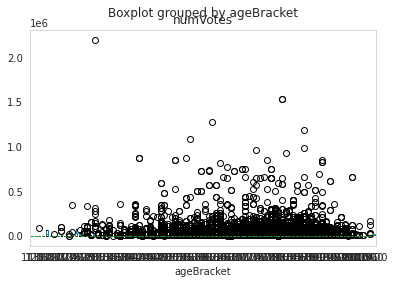

In [0]:
quantile_data.boxplot(by='ageBracket',column=['numVotes'],grid=False)

In [0]:
quantile_data['ageBracket'].mean()

72.71904304176012

so the mean age at which the male actor gets the success is 72.


***Now we will perform the question Number 4***


In [0]:
title_basics = pd.read_csv(fp3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ratings = pd.read_csv(fp7)

In [0]:
genre_data = pd.merge(ratings,title_basics,on='tconst')

In [0]:
# checking the title type 
genre_data['titleType'].value_counts()

tvEpisode       463291
movie           247408
short           119531
tvSeries         68550
video            55669
tvMovie          43547
videoGame        10784
tvMiniSeries      9789
tvSpecial         9139
tvShort           3166
Name: titleType, dtype: int64

In [0]:
#we are taking 'tvSeries' and tvMiniSeries because seasons are avliable for thes two only
tv_data = genre_data[genre_data['titleType'].isin(['tvSeries','tvMiniSeries'])]

In [0]:
tv_data.head()

,Unnamed: 0_x,tconst,averageRating,numVotes,Unnamed: 0_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
17489,17489,tt0035803,7.8,30,35188,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940,1945,12,"Documentary,News"
20160,20160,tt0039120,3.0,8,38451,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
20161,20161,tt0039123,8.5,126,38454,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama
20162,20162,tt0039125,5.9,7,38456,tvSeries,Public Prosecutor,Public Prosecutor,0,1947,1951,20,"Crime,Drama,Mystery"
20886,20886,tt0040021,7.2,51,39341,tvSeries,Actor's Studio,Actor's Studio,0,1948,1950,30,Drama


In [0]:
mean= tv_data['averageRating'].mean()
mean

6.7799384725360055

In [0]:
quantile = tv_data['averageRating'].quantile(0.90)
quantile

8.3

In [0]:
def rating_weight(y,m=quantile,C=mean):
  v=y['numVotes']
  r=y['averageRating']
  value= (v/(v+m))*r +(m/(m+v)*C)
  return value

In [0]:
#quantile_tv_data = tv_data.copy().loc[tv_data['numVotes']>=quantile]
#quantile_tv_data.shape

In [0]:
quantile_tv_data['score']= quantile_tv_data.apply(rating_weight,axis=1)

we have added the score column to our data set so that we can able to rank the best tv shows.


1.   And we chose averag rating and and number of votes as deciding factor
2.   so these are the two main factors contributing sucess of tv shows



In [0]:
quantile_tv_data.sort_values('score',ascending=False)
quantile_tv_data.head()


,Unnamed: 0_x,tconst,averageRating,numVotes,Unnamed: 0_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,score
17489,17489,tt0035803,7.8,30,35188,tvSeries,The German Weekly Review,Die Deutsche Wochenschau,0,1940,1945,12,"Documentary,News",7.578942
20161,20161,tt0039123,8.5,126,38454,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.393697
20886,20886,tt0040021,7.2,51,39341,tvSeries,Actor's Studio,Actor's Studio,0,1948,1950,30,Drama,7.141206
20887,20887,tt0040028,6.4,12,39348,tvSeries,Talent Scouts,Talent Scouts,0,1948,1958,30,"Comedy,Family,Music",6.555344
20890,20890,tt0040034,7.1,117,39354,tvSeries,Candid Camera,Candid Camera,0,1948,1950,30,"Comedy,Family,Reality-TV",7.078799


we choose teh best tv score by the score we defined.

In [0]:
title_episode = pd.read_csv(fp5)
title_episode.head()

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber
0,0,tt0041951,tt0041038,1,9
1,1,tt0042816,tt0989125,1,17
2,2,tt0042889,tt0989125,\N,\N
3,3,tt0043426,tt0040051,3,42
4,4,tt0043631,tt0989125,2,16


In [0]:
quantile_tv_data.columns = ['parentTconst','titleType','primaryTitle','originalTitle','isAdult','startYear','endYear','runtimeMinutes','genres','averageRating','numVotes','score']

ValueError: ignored

In [0]:
quantile_tv_data1 = pd.merge(quantile_tv_data,title_episode,on='parentTconst')
quantile_tv_data1.head()

Question 5 

1.   no of season for top 5 tv shows




In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='The Chosen']

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Breaking Bad']

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Koombiyo']

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Band of Brothers']

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Planet Earth II']


Planet Earth II had only one season

Now we will do question number 4 i.e we have to fourn average run time for top 5 best tv shows

In [0]:
quantile_tv_data1=quantile_tv_data.replace(r'\N',np.NaN)
quantile_tv_data1['runtimeMinutes']==pd.to_numeric(quantile_tv_data1['runtimeMinutes'])

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='The Chosen']['runtimeMinuts'].mean()

This shows average runtime was not provided in the data set

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Breaking Bad']['runtimeMinuts'].mean()

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Koombiyo']['runtimeMinuts'].mean()

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Band of Brothers']['runtimeMinuts'].mean()

In [0]:
quantile_tv_data1[quantile_tv_data1['originalTitle']=='Planet Earth II']['runtimeMinuts'].mean()

Question number 6

*   IN which year maximum tv shows ended
*   List item



In [0]:
quantile_tv_data1['endYear'].vaue_counts()